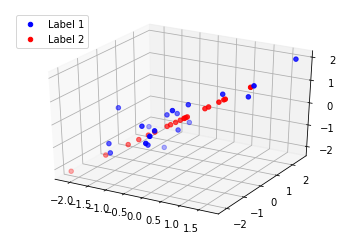

(20, 1)
(20, 3)


ValueError: shapes (20,3) and (20,1) not aligned: 3 (dim 1) != 20 (dim 0)

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Projects vector 'b' onto vector 'a'
def proj(b, a):
    #print a.shape
    #print (np.dot(a, b) / np.linalg.norm(a) ** 2).shape
    return (np.dot(a, b) / np.linalg.norm(a) ** 2) * a

# Take samples for Label 1
mean1 = np.array([0,0,0])
cov1 = ((1,.9,.9), (.9,1,.9), (.9,.9,1))
s1 = multivariate_normal(mean1, cov1, 20)

# Take samples for Label 2
mean2 = np.array([0,0,1])
cov2 = ((1,.8,.8), (.8,1,.8), (.8,.8,1))
s2 = multivariate_normal(mean2, cov2, 20)

''' Part 1 '''
# Scatter both data sets on a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s1[:,0], s1[:,1], s1[:,2], c = 'b', label = 'Label 1')
ax.scatter(s2[:,0], s2[:,0], s2[:,0], c = 'r', label = 'Label 2')
ax.legend(loc='upper left')
plt.show()

''' Part 2 '''
# Calculate between variance
btwnVar = np.dot((mean2 - mean1), (mean2 - mean1).transpose())

# Calculate within variances
within1 = np.dot((s1 - mean1), (s1 - mean1).transpose())
within2 = np.dot((s2 - mean2), (s2 - mean2).transpose())
withinVar = within1 + within2

# Find w* by finding leading eigenvector of S_w_inv * S_B??????
withinVarInverse = np.linalg.inv(withinVar) # Perform svd on this and THEN find the eigen values/vectors??? (According to TA)
fishersCoef = np.dot(withinVarInverse, btwnVar)
eig_vals, eig_vecs = np.linalg.eig(fishersCoef) # I'm just trying to find eigens directly though. Not sure if it will work
leading_ind = np.ndarray.tolist(eig_vals).index(np.amax(eig_vals))
leading_eigen_vec = np.matrix(eig_vecs[leading_ind])

projections1 = []
projections2 = []
for k in range(20):
    projections1.append(proj(np.matrix(s1[k]), leading_eigen_vec.transpose()))
    projections2.append(proj(np.matrix(s2[k]), leading_eigen_vec.transpose()))
projections1 = np.array(projections1)
projections2 = np.array(projections2)
print projections1.shape
print projections2.shape

''' Part 3 - Perform LDA using sklearn '''
# Consolidate the datasets and generate a corresponding label set
labels = []
data = []
for k in range(40):
    if k < 20:
        labels.append(1)
        data.append(s1[k])
    else:
        labels.append(2)
        data.append(s2[k - 20])
data = np.asmatrix(data)

# Train and fit the model, then transform the data
clf = LDA()
LDA(solver='svd', shrinkage='auto', tol=0.05)
clf.fit(data, labels)
s1_new = clf.transform(s1)
s2_new = clf.transform(s2)

# Plot the results
plt.eventplot(s1_new, orientation='horizontal', colors='b')
plt.eventplot(s2_new, orientation='horizontal', colors='r')
plt.show()